In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score

# load the dataset 

In [18]:
df=pd.read_csv("diabetes.csv")

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.size

6912

In [21]:
df.shape

(768, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
##class distibution
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

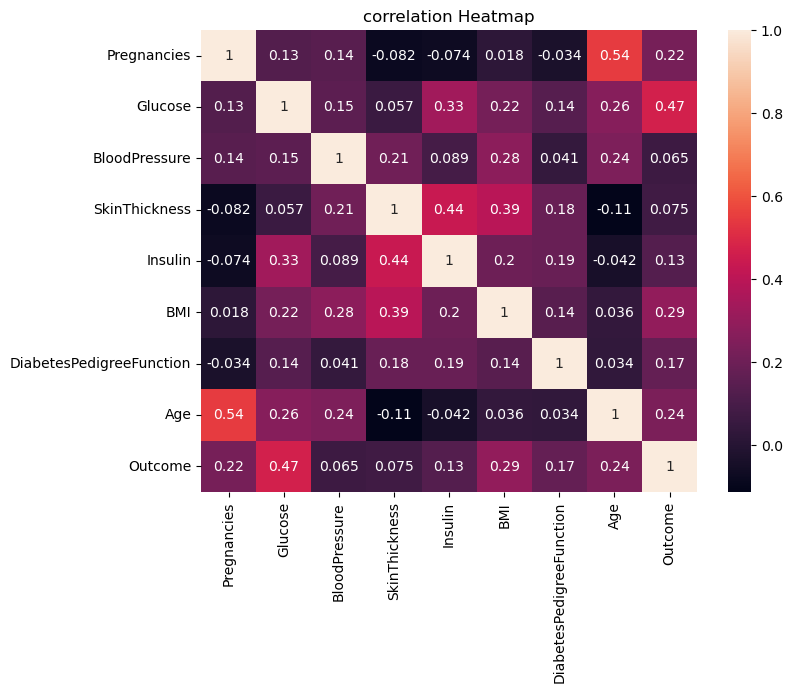

In [26]:
#correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation Heatmap")
plt.show()

In [27]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
#split the x and y
x=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [37]:
X_train, X_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
model = LogisticRegression(max_iter=1000)

In [41]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_pred = model.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred)

0.7467532467532467

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose has 5 zeros (0.65%)
BloodPressure has 35 zeros (4.56%)
SkinThickness has 227 zeros (29.56%)
Insulin has 374 zeros (48.70%)
BMI has 11 zeros (1.43%)

Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


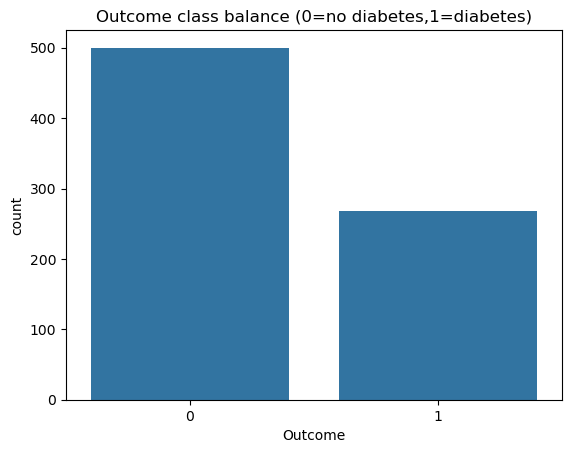

In [52]:
#EDA
display(df.describe().T)
#check 0 value in feature that can't be zero 
cols_cant_be_zero =["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for c in cols_cant_be_zero:
    zeros=(df[c]==0).sum()
    print(f"{c} has {zeros} zeros ({zeros/len(df):.2%})")

# Target balance 
print("\nTarget distribution:")
print(df['Outcome'].value_counts())
sns.countplot(x='Outcome',data=df)
plt.title("Outcome class balance (0=no diabetes , 1=diabetes)")
plt.show()

# additonal Analysis on data
# histogram for all ferature
# boxplot to see outliers
# Correlation heatmap

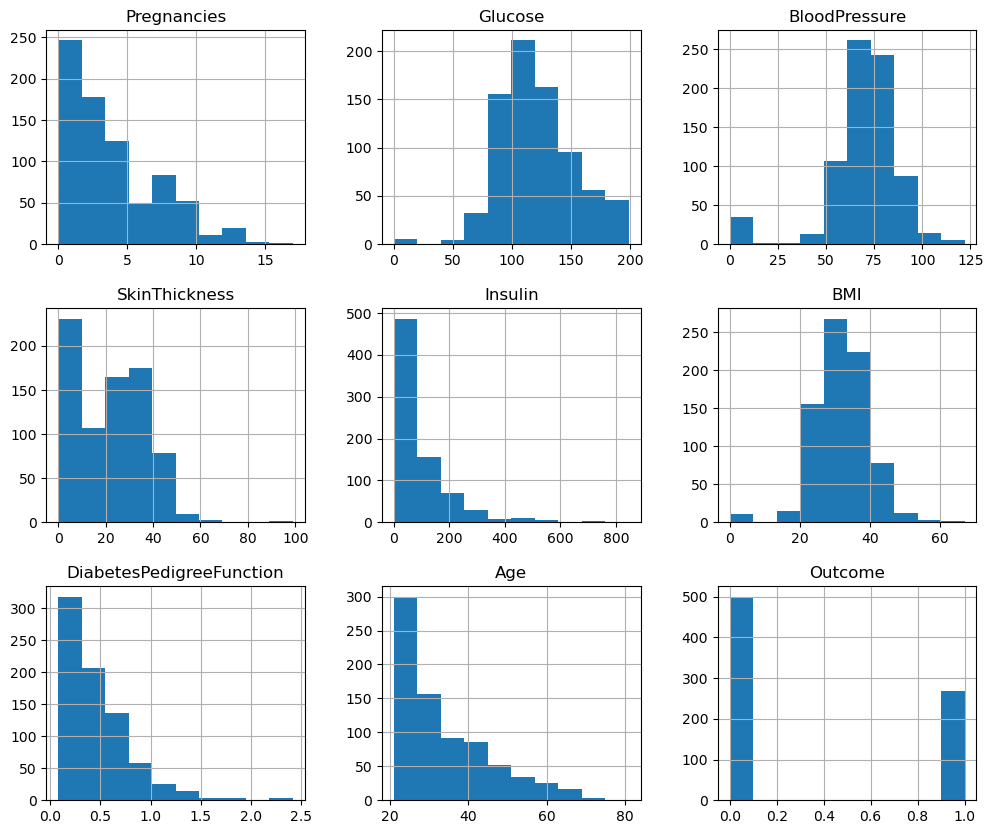

In [50]:
#additional Analysis on data 

df.hist(figsize=(12,10))
plt.show()

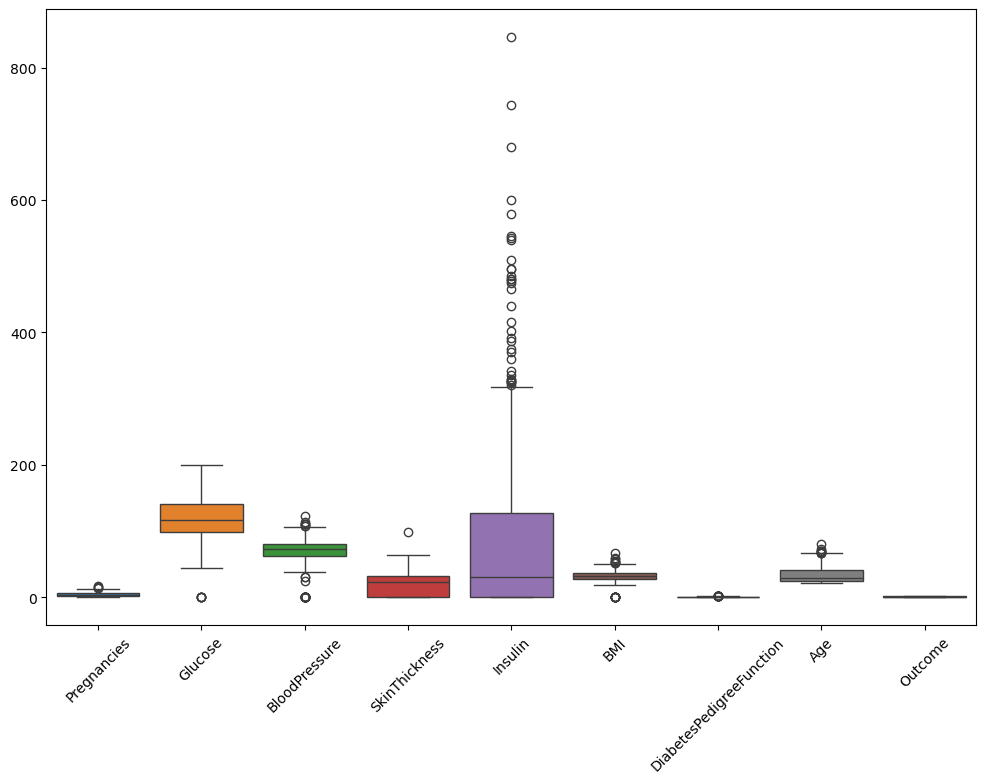

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

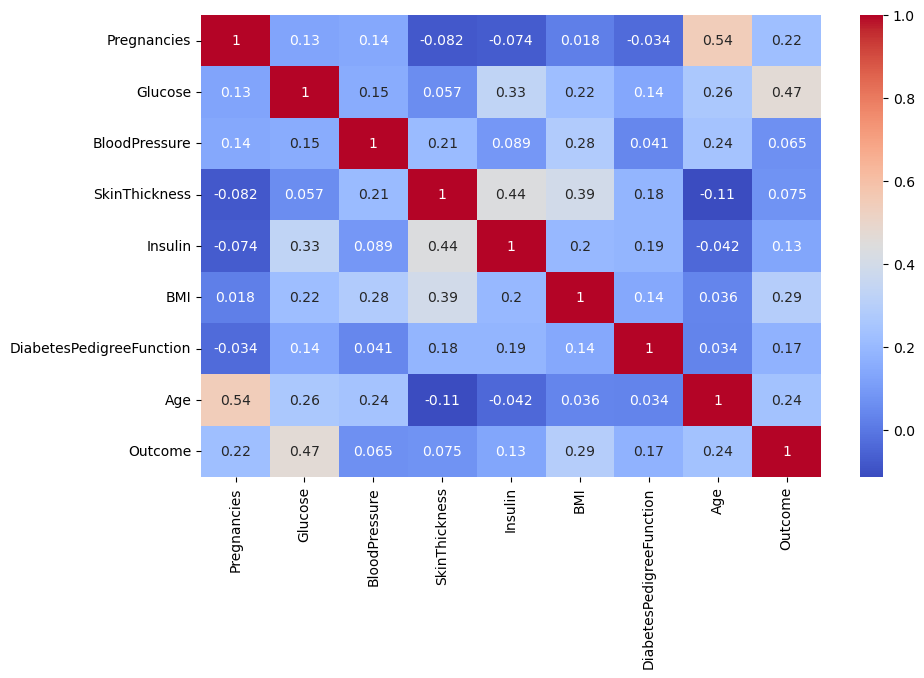

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
#replace zeros with median(or KNW)
cols_with_zero = ["Glucose","BloodPressure","s